In [1]:
from Bio import Phylo
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from itertools import combinations

# Ejercicio 2: Modificación de un Árbol Filogenético

En esta sección, se ha modificado el árbol filogenético para cambiar los nombres de ciertas especies y ajustar las longitudes de las ramas y colores de acuerdo a su proximidad evolutiva. Las especies **KX241132.1** y **KX241142.1** han sido renombradas a **Eriocnemis luciani (KX241132.1)** y **Haplophaedia aureliae (KX241142.1)** respectivamente, y su longitud de rama se ha ajustado a 0.5 con color azul. La especie **MZ593243.1** ha sido renombrada a **Arenicola marina (MZ593243.1)**, con una longitud de rama ajustada a 0.9 y color rojo. Con el objetivo de poder apreciar estos cambios, se implementará un códgio que permita visualizar las modificaciones realizadas en el árbol filogenético, destacando las especies más cercanas y la más distante en términos evolutivos.

In [4]:
def analyze_tree(newick_file):
    tree = Phylo.read(newick_file, "newick")
    
    num_terminals = len(tree.get_terminals())
    num_clades = len(list(tree.find_clades()))
    branch_lengths = [clade.branch_length for clade in tree.find_clades() if clade.branch_length is not None]
    terminal_names = [terminal.name for terminal in tree.get_terminals()]
    
    clades_with_bootstrap = [(clade.confidence, clade) for clade in tree.find_clades() if clade.confidence is not None]
    best_bootstrap, best_clade = (None, None)
    if clades_with_bootstrap:
        best_bootstrap, best_clade = max(clades_with_bootstrap, key=lambda x: x[0])
    
    min_distance, closest_pair = float('inf'), None
    for (name1, name2) in combinations(terminal_names, 2):
        distance = tree.distance(name1, name2)
        if distance < min_distance:
            min_distance = distance
            closest_pair = (name1, name2)
    
    max_distance, most_distant_species = float('-inf'), None
    for name in terminal_names:
        distance = tree.distance(tree.root, name)
        if distance > max_distance:
            max_distance = distance
            most_distant_species = name

    print(f"Información del árbol filogenético:")
    print(f"Número de terminales: {num_terminals}")
    print(f"Número de nodos/clados totales: {num_clades}")
    print(f"Longitudes de las ramas: {branch_lengths}")
    print(f"Nombres de terminales: {terminal_names}")
    
    if best_clade:
        print(f"Clado con el mejor bootstrap: {best_bootstrap}")
    if closest_pair:
        print(f"Especies más parecidas: {closest_pair} con distancia {min_distance}")
    if most_distant_species:
        print(f"Especie más distante desde la raíz: {most_distant_species} con distancia {max_distance}")
    
    return tree, closest_pair, most_distant_species

In [5]:
newick_file = "./data/hbb_tree.txt"
tree, closest_pair, most_distant_species = analyze_tree(newick_file)

Información del árbol filogenético:
Número de terminales: 22
Número de nodos/clados totales: 42
Longitudes de las ramas: [0.205701, 1.13866, 0.031261, 0.136879, 0.133087, 0.230584, 0.190835, 0.0953875, 0.162102, 0.28055, 0.0278707, 0.0186001, 0.0572805, 0.241457, 0.0286879, 0.0473548, 0.0106191, 0.00200754, 0.0021201, 0.00865119, 0.00195866, 0.0066246, 0.00852267, 5e-09, 0.0, 0.0, 0.0230908, 0.0215049, 0.00236303, 0.0103989, 0.012181, 0.0269614, 0.00456229, 0.00824827, 0.0273313, 0.00829855, 0.00242122, 0.023679, 0.00222634, 0.00210352, 0.00853381]
Nombres de terminales: ['AB364477.1', 'MZ593243.1', 'BT074827.1', 'BT082972.1', 'MT164172.1', 'NM_001160555.2', 'BT059665.1', 'OL804561.1', 'KX241110.1', 'KX241171.1', 'KX241173.1', 'KX241147.1', 'KX241132.1', 'KX241142.1', 'KX241189.1', 'KX241204.1', 'KX241222.1', 'KX241216.1', 'KX241252.1', 'KX241297.1', 'KX241301.1', 'KX241309.1']
Especies más parecidas: ('KX241132.1', 'KX241142.1') con distancia 0.0
Especie más distante desde la raíz: MZ

In [5]:
def modify_tree(tree):
    for clade in tree.find_clades():
        if clade.name == 'KX241132.1':
            clade.name = 'Eriocnemis luciani (KX241132.1)'

        elif clade.name == 'KX241142.1':
            clade.name = 'Haplophaedia aureliae (KX241142.1))'

        elif clade.name == 'MZ593243.1':
            clade.name = 'Arenicola marina (MZ593243.1)'

    for clade in tree.find_clades():
        if clade.name in ['Eriocnemis luciani (KX241132.1)', 'Haplophaedia aureliae (KX241142.1))']:
            clade.branch_length = 0.5
            clade.color = 'blue'

        elif clade.name == 'Arenicola marina (MZ593243.1)':
            clade.branch_length = 0.9
            clade.color = 'red'

    return tree


In [6]:
def plot_tree(tree, color_dict=None, branch_width=2):
    if color_dict:
        for clade in tree.find_clades():
            if clade.name in color_dict:
                clade.color = color_dict[clade.name]

    def color_func(clade):
        return getattr(clade, "color", "black")

    plt.figure(figsize=(15, 8))
    ax = plt.gca()

    Phylo.draw(tree, axes=ax, branch_labels=None, label_colors=color_func, do_show=False)

    for line in ax.findobj(match=lambda obj: isinstance(obj, plt.Line2D)):
        line.set_linewidth(branch_width)

    plt.title("Árbol Filogenético de la Subunidad Beta de la Hemoglobina")
    plt.show()


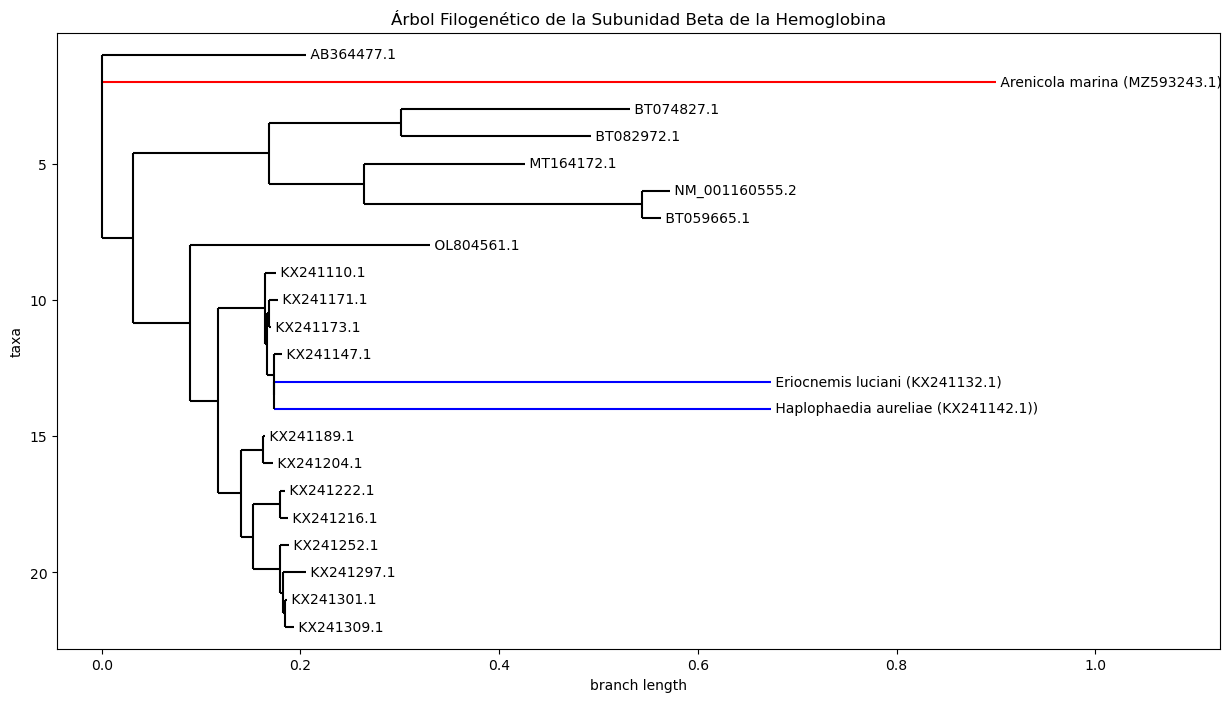

In [7]:
modified_tree = modified_tree = modify_tree(tree)
plot_tree(modified_tree)

Por último, guardamos el árbol generado en un fichero newick, `data/modified_hbb_tree.txt`, con el objetivo de hacer pruebas con él más adelante.

In [8]:
Phylo.write(modified_tree, './data/modified_hbb_tree.txt', 'newick')

1

Hagamos lo mismo ahora para el árbol generado a partir del exon 7 del gen foxp2. Para ello, modificaremos, al igual que en el caso anterior, las etiquetas, colores y longitudes de rama de las secuencias más próximas entre sí y la más distante, obteniendo el resultado siguiente, que puede contrastarse con lo obtenido en el primer ejercicio.

In [6]:
newick_file = "./data/foxp2_tree.txt"
tree, closest_pair, most_distant_species = analyze_tree(newick_file)

Información del árbol filogenético:
Número de terminales: 49
Número de nodos/clados totales: 80
Longitudes de las ramas: [0.0166911, 0.011142, 0.00589509, 5e-09, 0.011382, 0.0371728, 0.0113052, 0.00591973, 0.0172695, 5e-09, 0.0, 0.0, 0.0319958, 0.0387016, 0.0181483, 0.0112442, 0.00577904, 5e-09, 5e-09, 0.0, 0.0, 5e-09, 0.00578016, 0.0116581, 5e-09, 0.0116623, 0.0169115, 0.0740241, 5e-09, 0.0117189, 0.0114126, 5e-09, 0.00568333, 5e-09, 0.00856296, 5e-09, 0.0084896, 5e-09, 0.0142155, 0.0294058, 0.00407405, 5e-09, 0.0115014, 0.0, 0.0, 0.0086583, 0.00840327, 0.00849526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0350687, 5e-09, 5e-09, 0.00574618, 5e-09, 0.00843818, 0.00572098, 0.00569531, 5e-09, 5e-09, 5e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Nombres de terminales: ['EU087947.1', 'EU087945.1', 'EU087946.1', 'EU087944.1', 'EU087943.1', 'EU087941.1', 'EU087942.1', 'EU087933.1', 'EU087929.1', 'EU087928.1', 'EU087927.1', 'EU087930.1', 'EU087931.1', 'EU087932.1', 'EU087

In [7]:
def modify_tree(tree):
    for clade in tree.find_clades():
        if clade.name == 'EU087941.1':
            clade.name = 'Rhinolophus marshalli (EU087941.1)'

        elif clade.name == 'EU087942.1':
            clade.name = 'Rhinolophus paradoxolophus (EU087942.1))'

        elif clade.name == 'EU087940.1':
            clade.name = 'Megaderma lyra (EU087940.1)'

    for clade in tree.find_clades():
        if clade.name in ['Rhinolophus marshalli (EU087941.1)', 'Rhinolophus paradoxolophus (EU087942.1))']:
            clade.branch_length = 0.5
            clade.color = 'blue'

        elif clade.name == 'Megaderma lyra (EU087940.1)':
            clade.branch_length = 0.9
            clade.color = 'red'

    return tree


In [8]:
def plot_tree(tree, color_dict=None, branch_width=2):
    if color_dict:
        for clade in tree.find_clades():
            if clade.name in color_dict:
                clade.color = color_dict[clade.name]

    def color_func(clade):
        return getattr(clade, "color", "black")

    plt.figure(figsize=(15, 8))
    ax = plt.gca()

    Phylo.draw(tree, axes=ax, branch_labels=None, label_colors=color_func, do_show=False)

    for line in ax.findobj(match=lambda obj: isinstance(obj, plt.Line2D)):
        line.set_linewidth(branch_width)

    plt.title("Árbol Filogenético de la Subunidad Beta de la Hemoglobina")
    plt.show()


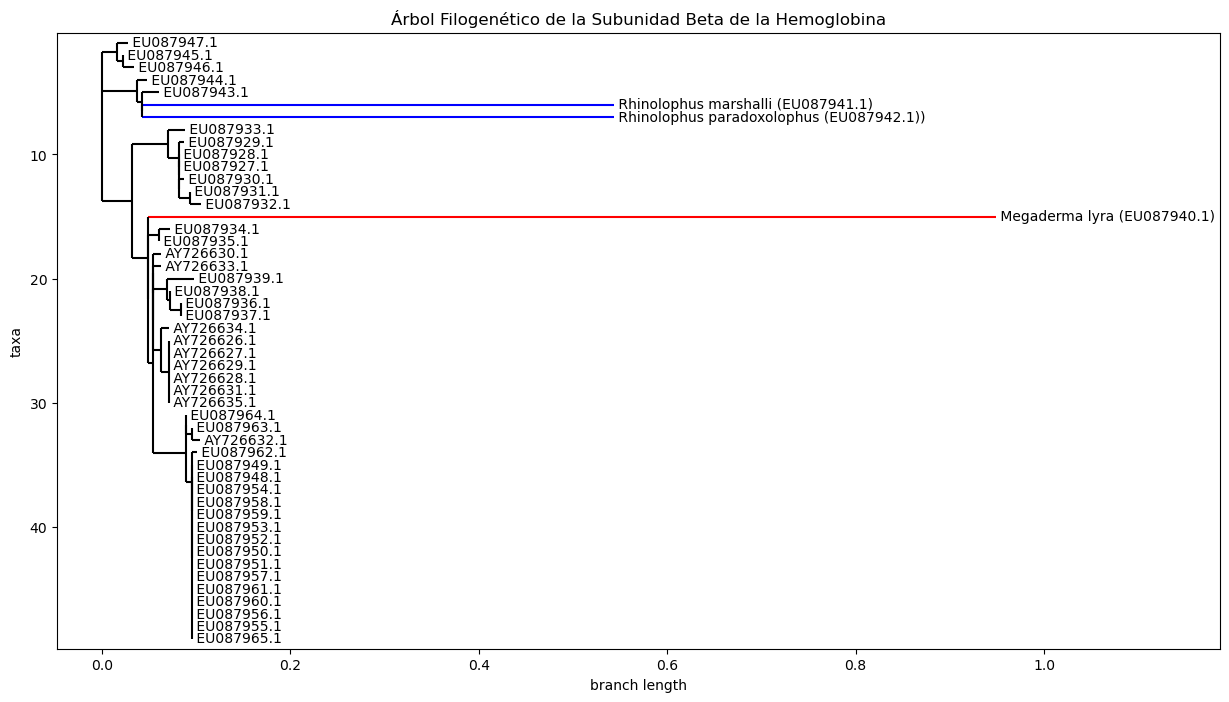

In [9]:
modified_tree = modified_tree = modify_tree(tree)
plot_tree(modified_tree)